In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv('./datasets/working_data/model_data_full.csv')

In [4]:
data.columns

Index(['intake_type', 'condition', 'age_in', 'breed', 'outcome', 'age_out',
       'sex', 'intact_out', 'age', 'primary_color', 'secondary_color',
       'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower', 'reps_upper',
       'height_low_inches', 'height_high_inches', 'weight_low_lbs',
       'weight_high_lbs', 'time_in_shelter', 'at_risk', 'breed_3'],
      dtype='object')

In [5]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,at_risk,breed_3
0,surrender,normal,16.0,dachshund,adoption,16.0,1,0,Senior,black,...,0.50,26.0,40.0,7.0,10.0,16.0,32.0,49,1,dachshund
1,surrender,injured,14.0,border collie,euthanasia,14.0,1,0,Senior,black,...,0.95,1.0,4.0,19.0,21.0,40.0,40.0,0,0,border collie
2,public_assist,aged,17.0,chihuahua,adoption,17.0,1,0,Senior,tan,...,0.30,41.0,80.0,6.0,9.0,2.0,5.0,9,0,chihuahua
3,surrender,injured,15.0,pug,euthanasia,15.0,1,0,Senior,gold,...,0.30,41.0,80.0,10.0,11.0,14.0,22.0,0,0,other
4,surrender,injured,15.0,pug,euthanasia,15.0,1,0,Senior,gold,...,0.30,41.0,80.0,10.0,11.0,14.0,22.0,0,0,other


In [6]:
y = data['time_in_shelter']
X = data.drop(columns=['time_in_shelter'])

In [7]:
# option 1
numeric_cols = ['age_in', 'sex', 'intact_out', 'pure', 'obey', 'reps_lower', 'reps_upper', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']

In [8]:
# option 2
numeric_cols = ['age_in', 'obey', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']

In [9]:
cat_features = ['age']

In [10]:
X_dum = pd.concat([
    # X[numeric_cols], 
    pd.get_dummies(X[cat_features]), 
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    # pd.get_dummies(X['condition'], prefix='condition'), 
    # pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [11]:
X_dum.head()

,age_Adult,age_Baby,age_Senior,age_Young
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [12]:
X_dum.shape

(25362, 4)

Add feature interaction

In [13]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_dum)

In [14]:
# with poly
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=123)

In [15]:
# without poly
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=123)

In [16]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [17]:
lr_params = {
    'alpha': [.05, .1, .25, .5],
}

lr = Lasso(random_state=123, max_iter=10_000)
gs_lr = GridSearchCV(lr, lr_params)

gs_lr.fit(X_train_sc, y_train)

GridSearchCV(estimator=Lasso(max_iter=10000, random_state=123),
             param_grid={'alpha': [0.05, 0.1, 0.25, 0.5]})

In [18]:
pd.DataFrame(gs_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007741,0.003776,0.001004,0.000142,0.05,{'alpha': 0.05},0.025130,0.024220,0.018388,0.018014,0.024565,0.022063,0.003169,1
1,0.006519,0.002713,0.001024,0.000121,0.1,{'alpha': 0.1},0.024970,0.024132,0.018502,0.018158,0.024486,0.022050,0.003051,2
2,0.008617,0.004633,0.000959,0.000218,0.25,{'alpha': 0.25},0.024413,0.023790,0.018758,0.018499,0.024171,0.021926,0.002701,3
3,0.006410,0.001313,0.001031,0.000213,0.5,{'alpha': 0.5},0.023225,0.022950,0.018897,0.018769,0.023386,0.021445,0.002138,4


In [19]:
# Score on training and testing sets.
print(f'Training Score: {round(gs_lr.score(X_train_sc, y_train),4)}')
print(f'Testing Score: {round(gs_lr.score(X_test_sc, y_test),4)}')

Training Score: 0.0232
Testing Score: 0.0241


Not looking good!!

In [20]:
np.round(mean_squared_error(y_test, gs_lr.predict(X_test_sc), squared=False), 2)

28.96

Baseline in days

In [21]:
np.round(y.mean(), 2)

19.34

Not getting any signal!! Will try to reduce the number of features

# PCA

In [22]:
X_dum = pd.concat([
    X[numeric_cols], 
    pd.get_dummies(X[cat_features]), 
    pd.get_dummies(X['breed_1']),
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    pd.get_dummies(X['condition'], prefix='condition'), 
    # pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=12)

In [24]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [25]:
pca = PCA(random_state=123, n_components=50)
pca.fit(X_train_sc)

PCA(n_components=50, random_state=123)

In [26]:
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)
pd.DataFrame(Z_train)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.571428,0.303640,-0.599505,-1.408895,0.405959,-1.283350,0.920092,-1.272572,-0.008944,0.041480,...,0.012684,0.004956,-0.040268,0.009166,-0.022012,0.016137,-0.014880,-0.117255,-0.057457,-0.024641
1,-4.345387,2.843281,-0.712241,-1.005980,-1.977862,3.026004,-0.281651,-0.142507,-0.517123,-0.979539,...,-0.004627,0.018239,-0.004027,-0.012344,0.004631,0.004564,-0.013872,-0.020635,0.002790,-0.008006
2,-3.912658,-0.037104,-0.588911,0.453589,-0.711672,-0.946484,-0.329229,-0.232468,0.311201,-1.004019,...,0.003948,0.017164,-0.010340,-0.002690,-0.008062,-0.006751,-0.000657,-0.005428,0.001019,-0.008043
3,2.382655,-0.535699,5.104921,-0.954000,-1.342176,-0.181478,0.225353,0.815652,-0.255777,1.009474,...,-0.025976,0.036365,0.025627,0.001600,-0.011766,-0.010269,-0.018231,-0.024102,0.008595,0.033402
4,0.997875,-0.757518,5.078878,-1.308265,-0.506785,-0.402140,1.495643,-1.500397,-1.574736,1.126548,...,-0.024076,0.039715,-0.010697,0.024521,-0.023901,-0.000858,-0.039935,-0.144997,-0.042610,0.012572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,1.090673,-0.760244,-0.491877,-1.406549,1.961945,0.697847,0.727020,-1.565143,-0.070442,0.917168,...,-0.020211,-0.051619,-0.027244,-0.006773,-0.018860,0.008044,0.022510,-0.022234,-0.037335,-0.017749
19017,-1.813109,0.765629,-0.718637,1.243003,-0.919596,-0.808915,0.166335,-1.837246,-0.227261,1.213774,...,1.306578,0.289026,-1.140718,-0.688559,-0.352368,1.637806,0.382399,0.422080,0.913273,0.151304
19018,2.215460,0.655901,4.473907,-0.210559,0.153434,-0.154813,-0.372188,1.092324,1.562249,-0.216362,...,-0.007169,-0.024084,0.002092,-0.000532,-0.006865,0.002600,0.010920,-0.013031,-0.004499,-0.015276
19019,-3.722205,-1.371756,-0.365438,0.601075,0.810439,1.108283,-0.565816,-0.085289,0.141993,-1.028691,...,0.001653,0.006083,-0.005611,-0.000021,-0.002969,-0.003507,0.001170,-0.004334,0.000342,0.000206


In [27]:
np.round(pca.explained_variance_ratio_, 4)

array([0.0383, 0.0163, 0.0141, 0.0115, 0.0105, 0.0101, 0.0081, 0.0078,
       0.0077, 0.0075, 0.0074, 0.0074, 0.0073, 0.0073, 0.0073, 0.0072,
       0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072,
       0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072,
       0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072, 0.0072,
       0.0072, 0.0072, 0.0072, 0.0072, 0.0071, 0.0071, 0.0071, 0.0071,
       0.0071, 0.0071])

In [28]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

Explained variance (first 10 components): [0.038 0.016 0.014 0.011 0.011 0.01  0.008 0.008 0.008 0.008]

Cumulative explained variance (first 10 components): [0.038 0.016 0.014 0.011 0.011 0.01  0.008 0.008 0.008 0.008]


In [29]:
## Set up dataframe with PCs and amount of explained variance
columns = [f'PCA_{i+1}' for i in pd.DataFrame(Z_train).columns]
var_ratio_df = pd.DataFrame({
    'Variation':var_exp,
    'PC':columns
})

var_ratio_df.head()

,Variation,PC
0,0.038337,PCA_1
1,0.016301,PCA_2
2,0.014140,PCA_3
3,0.011452,PCA_4
4,0.010523,PCA_5


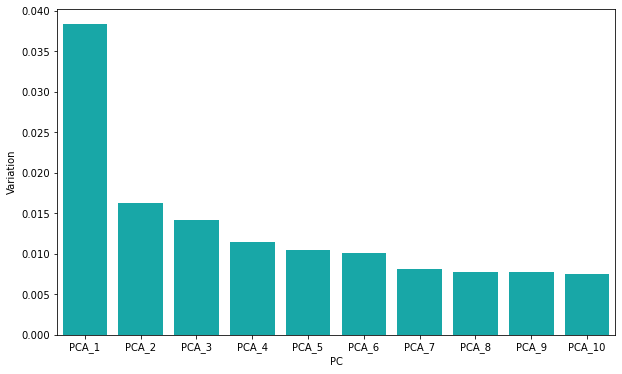

In [34]:
# Plot explained variance of each principal component
plt.figure(figsize = (10,6))
sns.barplot(x = var_ratio_df['PC'].head(10),
            y = var_ratio_df['Variation'].head(10), 
            data=var_ratio_df, color="c");

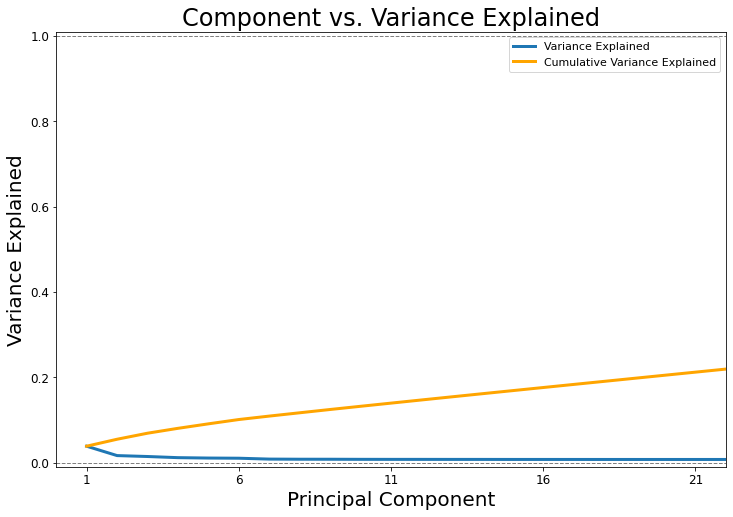

In [35]:
# Plot the variance explained (and cumulative variance explained).
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [37]:
pca_lr = Lasso().fit(Z_train, y_train)

print(f'Training RMSE: {round(pca_lr.score(Z_train, y_train),4)}')
print(f'Testing RMSE: {round(pca_lr.score(Z_test, y_test),4)}')

Training RMSE: 0.0732
Testing RMSE: 0.0671


In [38]:
mean_squared_error(y_test, pca_lr.predict(Z_test), squared=False)

28.361032037698248

# Decision Trees

In [39]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=123, min_samples_split=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=100, random_state=123)

In [40]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(mean_squared_error(y_test, rf.predict(X_test), squared=False))

0.1789138446125459
0.13925587998266187
27.24280988680873


In [41]:
tree = DecisionTreeRegressor(max_depth=5)

In [42]:
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.13264800709942215
0.10139553979115845
